                                                                Suyash Tambe
                                                                22070126117
                                                                AIML B2

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [11]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [12]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [13]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Missing values

In [28]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [29]:
round(df.isnull().sum()/len(df)*100,2)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [15]:
#instant column has only index value.
bike =df.drop(columns=['instant'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [20]:
df['dteday'] =df['dteday'].apply(lambda x: int(x.split('-')[0]))
bike = df.rename(columns={"dteday": "date"})
bike

,instant,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


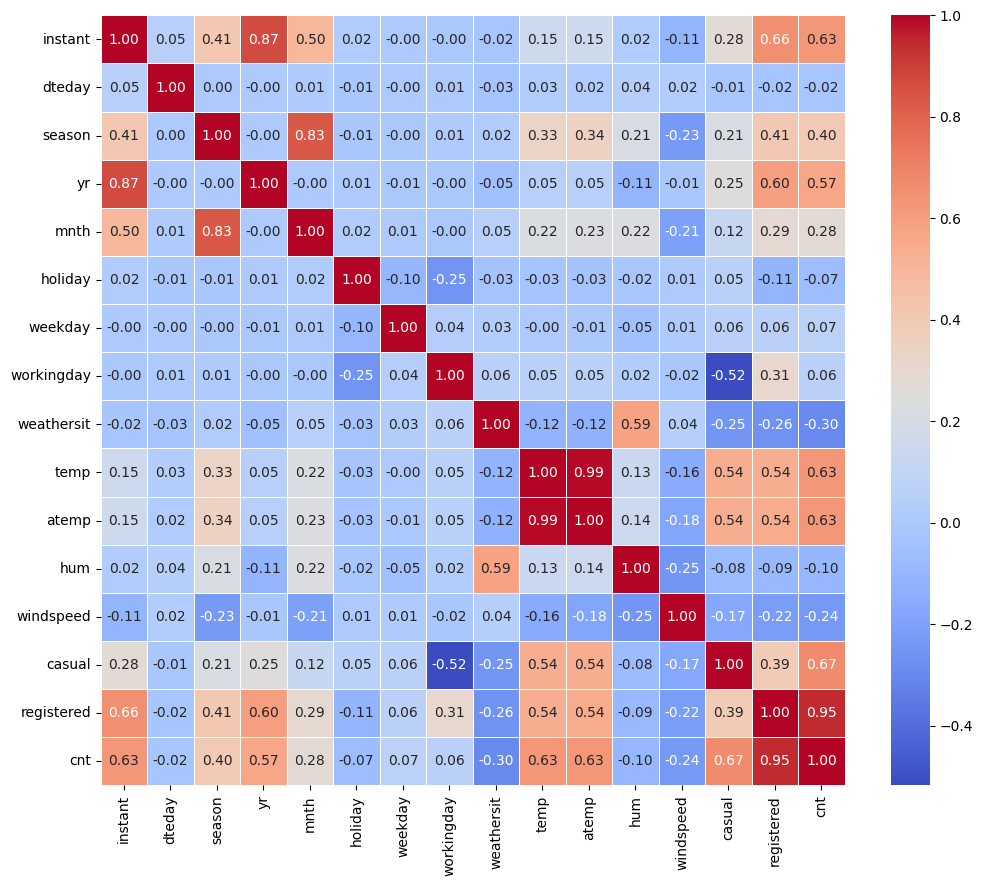

In [21]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.show()

In [22]:

correlation_matrix = df.corr()

# Find the pair with the highest absolute correlation coefficient
max_corr = correlation_matrix.abs().unstack().sort_values(ascending=False)
max_corr = max_corr[max_corr < 1]  # Exclude self-correlation (diagonal)
top_corr_pair = max_corr.idxmax()

print("Two variables with the best correlation:")
print(top_corr_pair),


Two variables with the best correlation:
('temp', 'atemp')


(None,)

Scatter plot

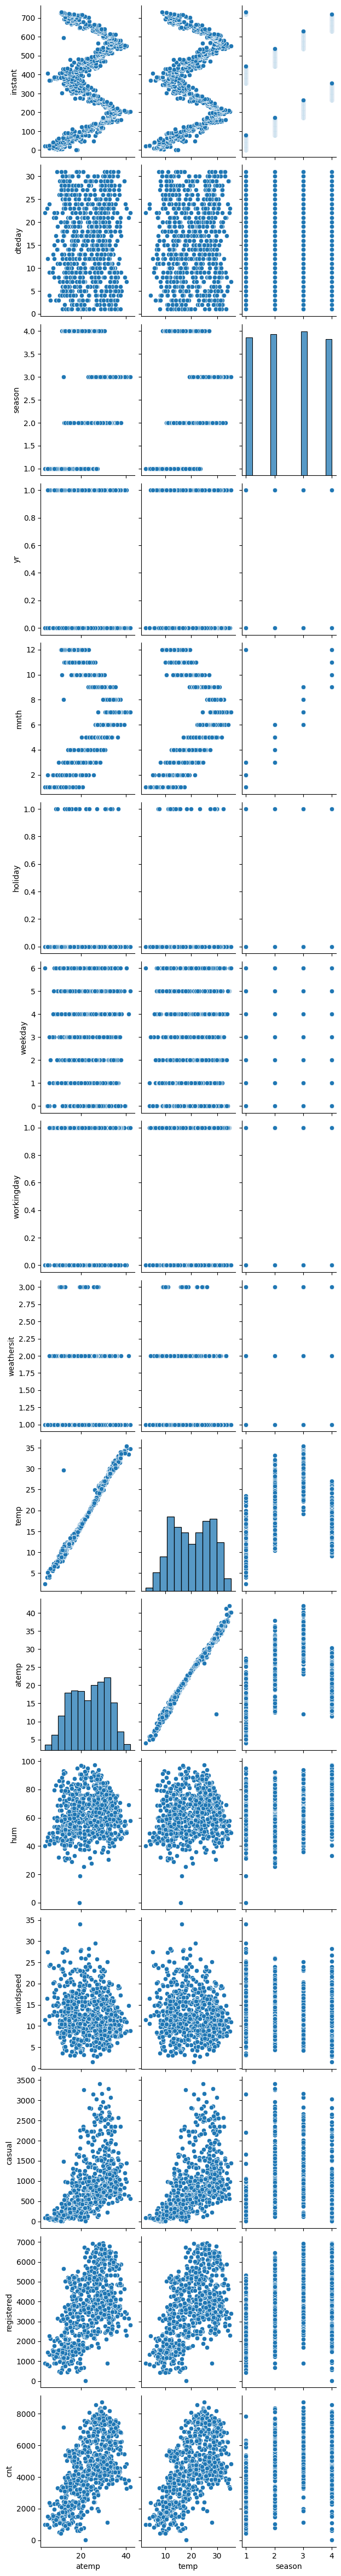

In [23]:
sns.pairplot(df, x_vars=['atemp', 'temp', 'season'], height=3, aspect=0.7, kind='scatter')
plt.show()

Scaler transform

In [26]:
features_to_scale = ['temp', 'atemp', 'hum', 'windspeed']
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,1,0,1,0,6,0,2,-0.827613,-0.680818,1.252343,-0.387833,331,654,985
1,2,2,1,0,1,0,0,0,2,-0.722069,-0.741507,0.480996,0.748899,131,670,801
2,3,3,1,0,1,0,1,1,1,-1.635432,-1.750344,-1.338073,0.745931,120,1229,1349
3,4,4,1,0,1,0,2,1,1,-1.615560,-1.610886,-0.261577,-0.389769,108,1454,1562
4,5,5,1,0,1,0,3,1,1,-1.468226,-1.505615,-1.340294,-0.046477,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27,1,1,12,0,4,1,2,-1.319509,-1.521749,0.177576,2.059845,247,1867,2114
726,727,28,1,1,12,0,5,1,2,-1.324068,-1.347378,-0.264634,-0.452029,644,2451,3095
727,728,29,1,1,12,0,6,0,2,-1.324068,-1.425011,0.880424,-0.853182,159,1182,1341
728,729,30,1,1,12,0,0,0,1,-1.310404,-1.490698,-1.014341,2.067858,364,1432,1796


slope and intercept

In [30]:
features_for_regression = ['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered']
target_variable = 'cnt'

for feature in features_for_regression:
    X = df[[feature]]
    y = df[target_variable]


    model = LinearRegression()
    model.fit(X, y)

  # coefficients (slope) and intercept
    slope = model.coef_[0]
    intercept = model.intercept_

    print(f"For {feature}:")
    print("Slope (Coefficient):", slope)
    print("Intercept:", intercept)
    print("\n")

For dteday:
Slope (Coefficient): -4.7110571580961285
Intercept: 4582.067249241522


For season:
Slope (Coefficient): 705.5397588671514
Intercept: 2745.123944967556


For yr:
Slope (Coefficient): 2204.4904109589042
Intercept: 3405.7616438356163


For mnth:
Slope (Coefficient): 156.1006585062156
Intercept: 3489.2896751731355


For holiday:
Slope (Coefficient): -795.902679830748
Intercept: 4530.902679830748


For weekday:
Slope (Coefficient): 65.17258718769499
Intercept: 4312.6676427853745


For workingday:
Slope (Coefficient): 260.1638341618303
Intercept: 4330.168831168831


For weathersit:
Slope (Coefficient): -1051.6036111322146
Intercept: 5974.489693332321


For temp:
Slope (Coefficient): 1213.1327865121948
Intercept: 4508.006849315068


For atemp:
Slope (Coefficient): 1220.1775837059208
Intercept: 4508.006849315068


For hum:
Slope (Coefficient): -190.6494456208357
Intercept: 4508.006849315068


For windspeed:
Slope (Coefficient): -454.90734840784665
Intercept: 4508.006849315068


Fo